In [1]:
import sys
sys.path.insert(0, '../src/')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.sparse as sp
from scipy.sparse import load_npz
import graph_statistics
import utils
from evaluation import (Evaluation, tabular_from_statistics, df_from_tabular, compute_original_statistics,
                        boxplot, make_rel_error_df, heat_map_from_df)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
eval_dict = {'Data set A':{'Stat 1':(.5, 1, .5), 'Stat 2':(.5, 1, 2), 'Stat 3':(.5, 1, 2)}, 
                'Data set B':{'Stat 1':(.5, 1, 2), 'Stat 2':(.5, 1, 2), 'Stat 3':(.5, 1, 2)}}
eval_df = pd.DataFrame(example_dict.values(), example_dict.keys())

In [81]:
def plot_eval_dict(eval_dict, width=1, rowpad=50, colpad=30, fontsize=15, save_path=None):
    # Remove annotations and axes
    rc = {"axes.spines.left" : False,
          "axes.spines.right" : False,
          "axes.spines.bottom" : False,
          "axes.spines.top" : False,
          "xtick.bottom" : False,
          "xtick.labelbottom" : False,
          "ytick.labelleft" : False,
          "ytick.left" : False}
    plt.rcParams.update(rc)
    plt.rcParams.update({'font.size': fontsize})

    # Number of datasets, statistics, and models
    first_inner_dict = eval_dict[list(eval_dict.keys())[0]]
    first_inner_tuple = first_inner_dict[list(first_inner_dict.keys())[0]]
    num_datasets = len(eval_dict.keys())
    num_statistics = len(first_inner_dict.keys())
    num_models = len(first_inner_tuple)

    # Make subplots
    fig, axs = plt.subplots(nrows=num_datasets, ncols=num_statistics, sharex=True, sharey=True)
    for i, (dataset, statistics_dict) in enumerate(eval_dict.items()):
        for j, (stat, val) in enumerate(statistics_dict.items()):
            for k in range(num_models):
                axs[i, j].bar(x=k*width, height=val[k], width=.9*width)

    # Set titles
    rows = list(eval_dict.keys())
    cols = list(first_inner_dict.keys())
    for ax, col in zip(axs[0], cols):
        ax.set_title(col, rotation=-45, pad=colpad, size='large')
    for ax, row in zip(axs[:,0], rows):
        ax.set_ylabel(row, rotation=0, labelpad=rowpad, size='large')

    fig.tight_layout()
    plt.show()
    if save_path:                                       
        plt.savefig(fname=save_path, bbox_inches='tight')     

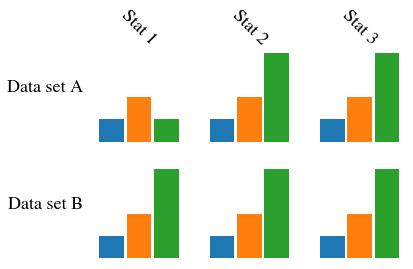

In [82]:
plot_eval_dict(eval_dict)

In [27]:
for i, j in enumerate([-1,-2,-3]):
    print(i, j)

0 -1
1 -2
2 -3


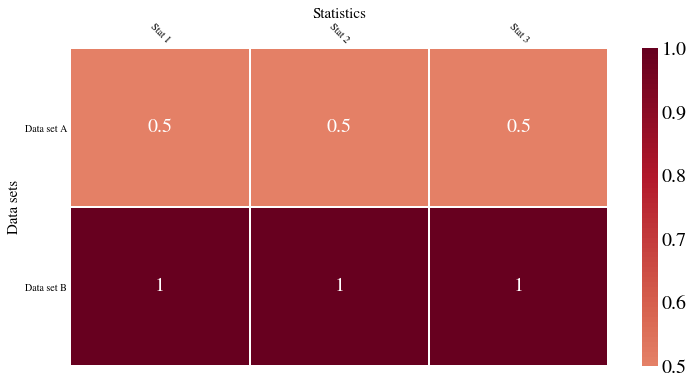

In [5]:
heat_map_from_df(df=example_df, figsize=(10, 5))